## LECTURE 4

In [1]:
print('hello')

hello


In [2]:
1+2

3

In [3]:
for number in (1,2,3):
    print(number)

1
2
3


In [4]:
print('1+3 is {}'.format(1+3))

1+3 is 4


In [1]:
!pip install psycopg2

In [2]:
import pandas
import configparser
import psycopg2

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [3]:
config = configparser.ConfigParser()
config.read('config.ini')

host=config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd = config['myaws']['pwd']

conn = psycopg2.connect(  host=host,
                       user=user,
                       password = pwd,
                       dbname=db)

In [4]:
cur=conn.cursor()

In [9]:
sql_statement = """ select bathroom,bedroom
            from public.house_price_full
            where bathroom>2"""

In [10]:
cur.execute(sql_statement)

In [11]:
cur.fetchone()

(3, 4)

In [12]:
for bathroom,bedroom in cur.fetchall()[:10]:
    print(bathroom,bedroom)

3 4
3 5
3 4
3 4
3 3
3 5
4 5
3 4
3 4
3 4


In [13]:
df=pandas.read_sql_query(sql_statement,conn)
df[:10]

,bathroom,bedroom
0,3,4
1,3,4
2,3,5
3,3,4
4,3,4
5,3,3
6,3,5
7,4,5
8,3,4
9,3,4


In [14]:
sql_statement= """
                select built_in,
                avg(price) as avg_price
                from public.house_price_full
                group by built_in
                order by built_in
                """

<AxesSubplot:xlabel='built_in'>

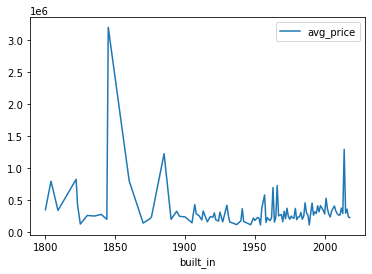

In [16]:
df_price=pandas.read_sql_query(sql_statement,conn)

df_price.plot(y='avg_price',x='built_in')

In [17]:
sql_statement= """
                select price,area
                from public.house_price_full
                """

<AxesSubplot:>

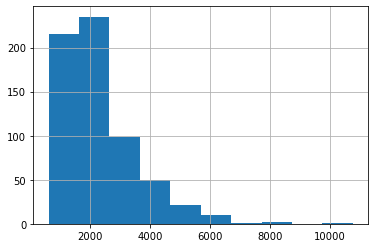

In [18]:
df_price=pandas.read_sql_query(sql_statement,conn)

df_price['area'].hist()

In [1]:
sql_statement= """
                select house_type,
                avg(price) as avg_price
                from public.house_price_full
                group by house_type
                order by avg_price desc
                """

<AxesSubplot:xlabel='house_type'>

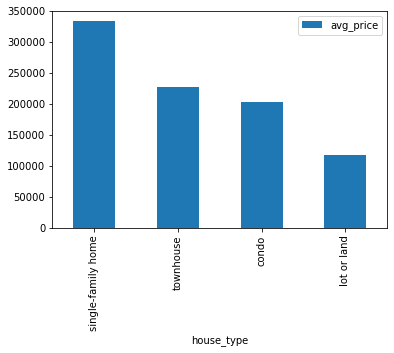

In [12]:
df_price=pandas.read_sql_query(sql_statement,conn)

df_price.plot.bar(x='house_type',y='avg_price')

In [13]:
sql_statement = """
                insert into gp11.student(s_email,s_name,major)
                values('{}','{}','{}')
                                
                """.format('s26@jmu.edu','s5','ia')

print(sql_statement)


                insert into gp11.student(s_email,s_name,major)
                values('s26@jmu.edu','s5','ia')
                                
                


In [14]:
cur.execute(sql_statement)

In [15]:
conn.rollback()

In [16]:
sql_statement = """
                insert into gp11.student(s_email,s_name,major)
                values('{}','{}','{}')
                                
                """.format('s6@jmu.edu','s6','ia')

In [17]:
cur.execute(sql_statement)

In [18]:
conn.commit()

In [19]:
df_student=pandas.read_sql_query('select * from gp11.student',conn)
df_student[:]

,s_email,s_name,major
0,sheparj@dukes.jmu.edu,Jane Shepard,Intelligence Analysis
1,wreu@dukes.jmu.edu,Urdnot Wrex,Computer Science
2,vakariag@dukes.jmu.edu,Garrus Vakarian,Intelligence Analysis
3,tsonl@dukes.jmu.edu,Liara T'Soni,Geographic Science
4,alenkk@dukes.jmu.edu,Kaiden Alenko,Intelligence Anlaysis
5,kriot@dukes.jmu.edu,Thane Krios,Computer Information Systems
6,gotk@dukes.jmu.edu,Kasumi Goto,Intelligence Analysis
7,lawsom@dukes.jmu.edu,Miranda Lawson,Computer Science
8,solum@dukes.jmu.edu,Mordin Solus,Geographic Science
9,tayloj@dukes.jmu.edu,Jacob Taylor,Computer Infromation Systems


In [20]:
sql_statement = """
               delete from gp11.student
               where s_email = '{}'
                                
                """.format('s6@jmu.edu','s6','ia')

print(sql_statement)


               delete from gp11.student
               where s_email = 's6@jmu.edu'
                                
                


In [22]:
cur.execute(sql_statement)

In [26]:
conn.rollback()

In [27]:
conn.commit()

In [28]:
df_student=pandas.read_sql_query('select * from gp11.student',conn)
df_student[:]

,s_email,s_name,major
0,sheparj@dukes.jmu.edu,Jane Shepard,Intelligence Analysis
1,wreu@dukes.jmu.edu,Urdnot Wrex,Computer Science
2,vakariag@dukes.jmu.edu,Garrus Vakarian,Intelligence Analysis
3,tsonl@dukes.jmu.edu,Liara T'Soni,Geographic Science
4,alenkk@dukes.jmu.edu,Kaiden Alenko,Intelligence Anlaysis
5,kriot@dukes.jmu.edu,Thane Krios,Computer Information Systems
6,gotk@dukes.jmu.edu,Kasumi Goto,Intelligence Analysis
7,lawsom@dukes.jmu.edu,Miranda Lawson,Computer Science
8,solum@dukes.jmu.edu,Mordin Solus,Geographic Science
9,tayloj@dukes.jmu.edu,Jacob Taylor,Computer Infromation Systems


In [5]:
cur.close()

In [6]:
conn.close()